In [149]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from joblib import dump, load

## 0.0 Get Data

In [150]:
df_test = pd.read_csv('../data/processed/test_scaled2.csv',index_col=False)

In [151]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,...,Garage Finish_Unf,Garage Finish_0,Garage Finish_Fin,Garage Finish_RFn,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Age of Remodel,Total Bath,Sum Qual
0,0,-1.462647,2658,902301120,190,RM,-0.004604,-0.124131,Pave,Grvl,...,1,0,0,0,0,0,1,1.558349,-0.269965,-2.106781
1,1,-1.460924,2718,905108090,90,RL,0.024245,-0.057246,Pave,None,...,0,0,1,0,0,0,1,0.263080,-0.269965,-0.593583
2,2,-1.459200,2414,528218130,60,RL,-0.533512,0.899980,Pave,None,...,0,0,0,1,0,0,1,-1.128135,1.593239,1.222254
3,3,-1.457477,1989,902207150,30,RM,-0.437347,-0.204136,Pave,None,...,1,0,0,0,1,0,0,-1.080162,-1.512101,-0.896223
4,4,-1.455753,625,535105100,20,RL,0.024245,-0.078083,Pave,None,...,0,0,0,1,0,0,1,1.078620,0.351103,0.616975


### 0.1 Prep data to fit model

In [152]:
num_col = df_test._get_numeric_data().drop(['Id', 'PID', 'Unnamed: 0','Unnamed: 0.1'], axis=1).columns.tolist()

## 1.0 Predictions

In [153]:
# Load saved model
regr = load('../models/elasticnet011819_cleantest.sav')

In [154]:
predictions = regr.predict(df_test[num_col])

In [155]:
predictions_log = np.expm1(predictions)

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


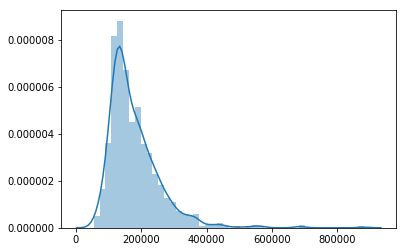

In [156]:
sns.distplot(predictions_log);

In [157]:
regr2 = load('../models/ENGS011819_customscore.sav')

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


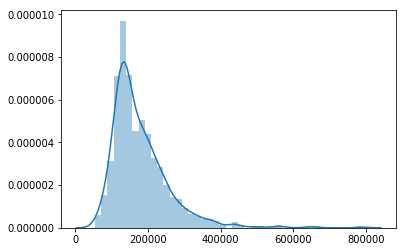

In [158]:
predictions2 = regr2.predict(df_test[num_col])
predictions_log2 = np.expm1(predictions2)
sns.distplot(predictions_log2);

## 2.0 Submissions

In [164]:
df_submission = pd.DataFrame()

In [165]:
df_submission['SalePrice'] = predictions_log2

In [166]:
df_submission['Id'] = df_test['Id']

In [167]:
df_submission['SalePrice'] = df_submission['SalePrice'].apply(lambda x: round(x,0))

In [168]:
# Create CSV for Kaggle submission
df_submission.to_csv("../data/external/submission_ENGS_011819_custom.csv", index=False)